# 유튜브 트렌드 분석

##### 패션 커버댄스 메이크업 보디빌딩 노래커버 룩북 베이킹
##### 기간 : 2021년 1월 ~ 2022년 6월
- 데이터 출처 : https://playboard.co/


In [232]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import platform
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
topic_list=['fashion', 'cover-dance', 'makeup', 'body-building', 'cover-song', 'lookbook', 'baking']

In [10]:
month_dict= {'2021.01':'1609459200', '2021.02':'1612137600', '2021.03':'1614556800', '2021.04':'1617235200',
             '2021.05':'1619827200', '2021.06':'1622505600', '2021.07':'1625097600', '2021.08':'1627776000', 
             '2021.09':'1630454400', '2021.10':'1633046400', '2021.11':'1635724800', '2021.12':'1638316800', 
             '2022.01':'1640995200', '2022.02':'1643673600', '2022.03':'1646092800', '2022.04':'1648771200', 
             '2022.05':'1651363200', '2022.06':'1654041600'}

In [67]:
list(month_dict.values())

['1609459200',
 '1612137600',
 '1614556800',
 '1617235200',
 '1619827200',
 '1622505600',
 '1625097600',
 '1627776000',
 '1630454400',
 '1633046400',
 '1635724800',
 '1638316800',
 '1640995200',
 '1643673600',
 '1646092800',
 '1648771200',
 '1651363200',
 '1654041600']

In [71]:
list(month_dict.keys())[0]

'2021.01'

In [15]:
name_list=[]
score_list=[]

for i in range(len(topic_list)):
    for j in range(len(month_dict.keys())):
        html=requests.get('https://playboard.co/youtube-ranking/most-viewed-'+topic_list[i]+'-channels-in-south-korea-monthly?period='+list(month_dict.values())[j])
        #print('topic ==>', topic_list[i])
        #print('month ==>', list(month_dict.keys())[j])
        soup=BeautifulSoup(html.text, 'html.parser')
        if soup.find('table', {'class':'sheet'}) is None:
            name_list.append(np.nan)
            score_list.append(np.nan)
        else:
            sheet=soup.find('table', {'class':'sheet'})
            tbody=sheet.find('tbody')
            chart_row=tbody.find('tr', {'class':'chart__row'})
            name_list.append(chart_row.find('a', {'class':'name__label'}).text)
            score_list.append(chart_row.find('td', {'class':'score'}).text)

In [16]:
# 2021.01~2022.06 조회수 1위의 이름, 조회수
print('name_list ==>', name_list)
print('score_list ==>', score_list)

name_list ==> [nan, '핏더사이즈', 'TRB 트렌드 리뷰 브랜드', '깡스타일리스트', '깡스타일리스트', '깡스타일리스트', '깡스타일리스트', '신의손이선생 - DIY edigna', '신의손이선생 - DIY edigna', '신의손이선생 - DIY edigna', '신의손이선생 - DIY edigna', 'tvN D STUDIO', '신의손이선생 - DIY edigna', '신의손이선생 - DIY edigna', '신의손이선생 - DIY edigna', '신의손이선생 - DIY edigna', '신의손이선생 - DIY edigna', '신의손이선생 - DIY edigna', nan, 'ARTBEAT', 'ARTBEAT', 'ARTBEAT', 'ARTBEAT', 'ARTBEAT', 'ARTBEAT', 'ARTBEAT', 'ARTBEAT', '땡깡DanceKang', 'ARTBEAT', 'ARTBEAT', 'ARTBEAT', 'ARTBEAT', '땡깡DanceKang', 'ARTBEAT', 'ARTBEAT', 'ARTBEAT', "자몽's beauty", '스마일밤 Smile Bam', '스마일밤 Smile Bam', '스마일밤 Smile Bam', '스마일밤 Smile Bam', '진절미 Jinjeolme', '스마일밤 Smile Bam', '스마일밤 Smile Bam', '스마일밤 Smile Bam', '스마일밤 Smile Bam', '스마일밤 Smile Bam', '스마일밤 Smile Bam', 'free지아', '스마일밤 Smile Bam', '스마일밤 Smile Bam', '스마일밤 Smile Bam', '스마일밤 Smile Bam', '스마일밤 Smile Bam', nan, '피지컬갤러리', '피지컬갤러리', '피지컬갤러리', '지피티', '피지컬갤러리', '헬창TV Korea Fitness HellchangTV', '지피티', '피지컬갤러리', '피지컬갤러리', 'MBC every1', '피지컬갤러리', '박승현', '박승현', 

In [234]:
df_dict = {}   # 데이터프레임 모으는 딕셔너리

# 각 토픽의 조회수를 데이터프레임으로 만들기
for i in range(len(topic_list)):
    topic = topic_list[i]
    df_dict[topic] = pd.DataFrame({'채널명': name_list[18*i:18*(i+1)], '조회수':score_list[18*i:18*(i+1)]}, index=list(month_dict.keys()))
    
df_dict

{'fashion':                          채널명         조회수
 2021.01                  NaN         NaN
 2021.02                핏더사이즈   5,721,950
 2021.03       TRB 트렌드 리뷰 브랜드   7,818,107
 2021.04              깡스타일리스트   7,776,840
 2021.05              깡스타일리스트   9,429,140
 2021.06              깡스타일리스트  10,740,595
 2021.07              깡스타일리스트   9,278,704
 2021.08  신의손이선생 - DIY edigna   8,913,745
 2021.09  신의손이선생 - DIY edigna  63,207,360
 2021.10  신의손이선생 - DIY edigna  20,135,703
 2021.11  신의손이선생 - DIY edigna  50,612,852
 2021.12         tvN D STUDIO  18,401,238
 2022.01  신의손이선생 - DIY edigna  50,665,274
 2022.02  신의손이선생 - DIY edigna  38,152,820
 2022.03  신의손이선생 - DIY edigna  15,553,786
 2022.04  신의손이선생 - DIY edigna  22,487,997
 2022.05  신의손이선생 - DIY edigna  19,603,882
 2022.06  신의손이선생 - DIY edigna  14,986,356,
 'cover-dance':                  채널명         조회수
 2021.01          NaN         NaN
 2021.02      ARTBEAT  24,210,863
 2021.03      ARTBEAT  38,737,068
 2021.04      ARTBEAT  28,266,792
 2021

In [18]:
# 데이터프레임으로 만들기
for topic in topic_list:
    df_dict[topic].to_csv('{}.csv'.format(topic), encoding='utf-8')

In [19]:
pd.read_csv('fashion.csv')

,Unnamed: 0,채널명,조회수
0,2021.01,NaN,NaN
1,2021.02,핏더사이즈,"5,721,950"
2,2021.03,TRB 트렌드 리뷰 브랜드,"7,818,107"
3,2021.04,깡스타일리스트,"7,776,840"
4,2021.05,깡스타일리스트,"9,429,140"
5,2021.06,깡스타일리스트,"10,740,595"
6,2021.07,깡스타일리스트,"9,278,704"
7,2021.08,신의손이선생 - DIY edigna,"8,913,745"
8,2021.09,신의손이선생 - DIY edigna,"63,207,360"
9,2021.10,신의손이선생 - DIY edigna,"20,135,703"


In [217]:
df_dict.keys()

dict_keys(['fashion', 'cover-dance', 'makeup', 'body-building', 'cover-song', 'lookbook', 'baking'])

In [20]:
mean_list=[]  # 각 토픽별 평균 담는 리스트

# 각 토픽별 평균 구하기
for i in range(len(list(df_dict.keys()))):
    mean_list.append(round(df_dict[topic_list[i]]['조회수'].str.replace(',','').apply(pd.to_numeric).mean(), 2))
    

print(mean_list)

[21969785.24, 25243118.71, 37463217.17, 22669781.35, 26537713.94, 12076053.72, 9365174.12]


<BarContainer object of 7 artists>

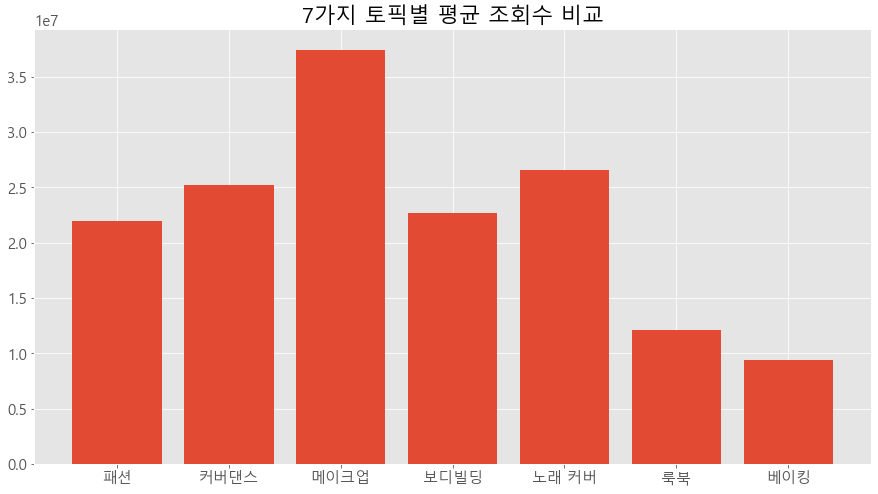

In [21]:
import platform
import matplotlib.pyplot as plt

plt.style.use('ggplot')
if platform.system()=='Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    
plt.figure(figsize=(15, 8))
my_xtick=['패션', '커버댄스', '메이크업', '보디빌딩', '노래 커버', '룩북', '베이킹']
plt.rc('font', size=15)
plt.title('7가지 토픽별 평균 조회수 비교')
plt.bar(my_xtick, mean_list)

7가지 토픽 중에서는 메이크업 카테고리가 가장 안전한 카테고리인 것으로 보임

In [119]:
# makeup 카테고리의 조회수가 가장 많은 채널명
df_dict['makeup'][df_dict['makeup']['조회수']==df_dict['makeup']['조회수'].max()]

,채널명,조회수
2022.03,스마일밤 Smile Bam,"86,109,619"


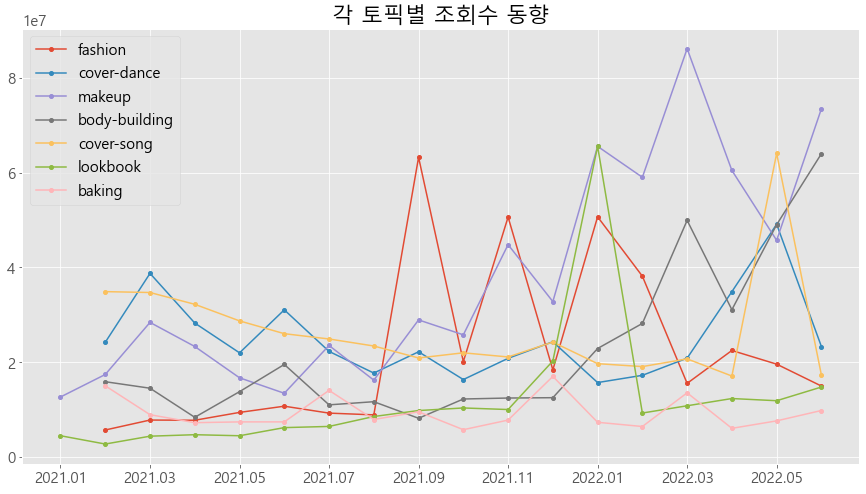

In [224]:
plt.figure(figsize=(15, 8))
for topic in topic_list:
    df_dict[topic]['조회수'].str.replace(',','').apply(pd.to_numeric).plot(marker='o', ms=4)
plt.legend(topic_list)
plt.title('각 토픽별 조회수 동향')
plt.show()

최근 높은 조회수 => '메이크업',

최근 사람들의 건강, 헬스에 대한 관심 => '보디빌딩'이 조회수가 잘 나올 것으로 예상됨.

하지만 '패션', '커버댄스', '커버송', '룩북', '베이킹' 카테고리는 평균적으로 조회수가 낮기 때문에 안전한 카테고리는 아님.

# =================================================================

## 조회수가 높은 5가지 부문의 1위 채널 분석하기
- 한문철TV(자동차/교통), 스마일밤 Smile Bam(메이크업), Jane ASMR 제인(먹방), 계향쓰 GH's(게임), ITSub(IT)

### 기간 대비 영상 개수 분석

In [120]:
info_dict={'한문철TV':'UCH5U89kvHrVxxS80xpoOydw', '스마일밤 Smile Bam':'UCKo9E6a6-E40CC6OdSbvcdA', 
 'Jane ASMR 제인':'UC2fsxQr6Hcx1enORxXgKpxQ', "계향쓰 GH's":'UCdrBnBNLsN4_cH32HWbr9qg',
'ITSub':'UCdUcjkyZtf-1WJyPPiETF1g'}
`
#'https://playboard.co/channel/'+'UCH5U89kvHrVxxS80xpoOydw' => PLAYBOARD에서 한문철TV 정보

In [207]:
# 영상 총 개수 가져오기
video_nums={}

for key in info_dict.keys():
    html=requests.get('https://playboard.co/channel/'+info_dict[key])
    soup=BeautifulSoup(html.text, 'html.parser')
    
    if key in ['한문철TV', 'ITSub']:
        video_nums[key]=int(soup.find_all('li', {'class':'num'})[3].text.split('\n')[1].split()[0][:-1].replace(',',''))

    else:
        video_nums[key]=int(soup.find_all('li', {'class':'num'})[2].text.split('\n')[1].split()[0][:-1].replace(',',''))
    
print(video_nums)

{'한문철TV': 18466, '스마일밤 Smile Bam': 68, 'Jane ASMR 제인': 1533, "계향쓰 GH's": 212, 'ITSub': 945}


In [225]:
# 가입 날짜 불러오기
join_date={}
for key in info_dict.keys():
    html=requests.get('https://playboard.co/channel/'+info_dict[key]+'/about')
    soup=BeautifulSoup(html.text, 'html.parser')
    ul=soup.find_all('div', {'class':'widget__body'})[2]
    join_date[key]=ul.find_all('li')[0].text.split('\n')[1][-10:]
    
join_date

{'한문철TV': '2018.09.03',
 '스마일밤 Smile Bam': '2020.07.16',
 'Jane ASMR 제인': '2012.11.16',
 "계향쓰 GH's": '2020.07.07',
 'ITSub': '2016.08.07'}

In [239]:
# 오늘 날짜에서 가입 날짜 빼기 => 가입일로부터 며칠 지났는지 확인
for key in join_date.keys():
    day=str(datetime.today()-pd.to_datetime(join_date[key])).split('days')[0].strip()
    print('{} 채널이 가입한지 {}일 지났습니다.'.format(key, day))

한문철TV 채널이 가입한지 1423일 지났습니다.
스마일밤 Smile Bam 채널이 가입한지 741일 지났습니다.
Jane ASMR 제인 채널이 가입한지 3540일 지났습니다.
계향쓰 GH's 채널이 가입한지 750일 지났습니다.
ITSub 채널이 가입한지 2180일 지났습니다.


In [233]:
# 기간 대비 올린 영상 개수 확인
for key in join_date.keys():
    days=int(str(datetime.today()-pd.to_datetime(join_date[key])).split('days')[0])
    num=video_nums[key]
    print('{} 채널이 영상 1개 올리는 주기 : {}일'.format(key, int(days/num)))

print()
han_days=int(str(datetime.today()-pd.to_datetime(join_date['한문철TV'])).split('days')[0])
han_num=video_nums['한문철TV']
print('한문철TV가 하루에 올리는 영상 개수 : {}개'.format(int(han_num/han_days)))

한문철TV 채널이 영상 1개 올리는 주기 : 0일
스마일밤 Smile Bam 채널이 영상 1개 올리는 주기 : 10일
Jane ASMR 제인 채널이 영상 1개 올리는 주기 : 2일
계향쓰 GH's 채널이 영상 1개 올리는 주기 : 3일
ITSub 채널이 영상 1개 올리는 주기 : 2일

한문철TV가 하루에 올리는 영상 개수 : 12개


### 5개 부문의 평균 영상 업로드 주기 : 3일

### => 평균 영상 업로드 주기는 2-3일로 잡으면 좋을듯함.